In [1]:
import pandas as pd
import datetime 
import numpy as np
import pickle
import matplotlib.pyplot as plt
import dtale
import re
import seaborn as sns

%matplotlib inline

In [2]:
smileon = pd.read_csv('../data/smileon_visualready.csv')
smileon2 = pd.read_csv('../data/smileon_edited.csv')

In [3]:
smileon.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort,imaging,plaque_removal,...,tooth_extractions_removals,sinus_perforation_closure,biopsy,alveoloplasty,excision_lesions,abscess_drain,pericoronalgingiva_excision,surgery_fibroustuberosity_reduction,emergencytreatment_dentalpain,occlusal_adjustment
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
smileon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           10709 non-null  int64  
 1   s_difficulty_eating                  10709 non-null  float64
 2   s_difficulty_speaking                10709 non-null  float64
 3   s_drymouth                           10709 non-null  float64
 4   s_felt_anxiety                       10709 non-null  float64
 5   s_felt_embarrassed                   10709 non-null  float64
 6   s_avoided_smiling                    10709 non-null  float64
 7   s_pain_discomfort                    10709 non-null  float64
 8   imaging                              10709 non-null  float64
 9   plaque_removal                       10709 non-null  float64
 10  sealant                              10709 non-null  float64
 11  medicament                  

SETTING GRAPH SIZE/COLOR/STYLE DEFAULTS 

In [5]:
#for consistency:  teammate Robert uses this foundation for all his seaborn graphics:

sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [6]:
'''#Group project specified color palette:

smileplus_palette = sns.color_palette(["#980000", "#FBF9F9", "#18425A","507184","0D94BF"])
#color_codes_wanted = ['red', 'white', 'dark blue','light blue', 'bright blue']

sns.set_palette(smileplus_palette)

#c = lambda x: smileplus_palette[color_codes_wanted.index(x)]

#cannot get this specialized color palette to work???'''

'#Group project specified color palette:\n\nsmileplus_palette = sns.color_palette(["#980000", "#FBF9F9", "#18425A","507184","0D94BF"])\n#color_codes_wanted = [\'red\', \'white\', \'dark blue\',\'light blue\', \'bright blue\']\n\nsns.set_palette(smileplus_palette)\n\n#c = lambda x: smileplus_palette[color_codes_wanted.index(x)]\n\n#cannot get this specialized color palette to work???'

My teammate seems to be able to set their color palette and then get it to work without needing to reference back to it.  I do not seem to be able to do the same.  perhaps because of the type of graphs I'm using?  Unsure.  Ended up creating graphs here in python, then editing graphs manually in paint in order to get the colors I wanted since I could not figure out how to get my specified color palette to work.

CREATING SPECIFIC DFS FOR SUBSETS OF DATA FOR GRAPHING

Data only for patients reporting "difficulty eating"

In [7]:
smileon_eating = smileon[smileon['s_difficulty_eating']>=1]
smileon_eating.head()
smileon_eating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2960 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2960 non-null   int64  
 1   s_difficulty_eating                  2960 non-null   float64
 2   s_difficulty_speaking                2960 non-null   float64
 3   s_drymouth                           2960 non-null   float64
 4   s_felt_anxiety                       2960 non-null   float64
 5   s_felt_embarrassed                   2960 non-null   float64
 6   s_avoided_smiling                    2960 non-null   float64
 7   s_pain_discomfort                    2960 non-null   float64
 8   imaging                              2960 non-null   float64
 9   plaque_removal                       2960 non-null   float64
 10  sealant                              2960 non-null   float64
 11  medicament                   

In [8]:
smileon['s_difficulty_eating'].value_counts()

0.0    7749
1.0    2960
Name: s_difficulty_eating, dtype: int64

Here's why my number of rows and total of sum don't match
somehow, some patients have more than 1 value.  Probably, some patients have more than one intake?
... I probably need to go back to my df and fix this - change all values of >=1 to 1 

Data only for patients reporting "difficulty speaking"

In [9]:
smileon_speaking = smileon[smileon['s_difficulty_speaking']>=1]
smileon_speaking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1246 non-null   int64  
 1   s_difficulty_eating                  1246 non-null   float64
 2   s_difficulty_speaking                1246 non-null   float64
 3   s_drymouth                           1246 non-null   float64
 4   s_felt_anxiety                       1246 non-null   float64
 5   s_felt_embarrassed                   1246 non-null   float64
 6   s_avoided_smiling                    1246 non-null   float64
 7   s_pain_discomfort                    1246 non-null   float64
 8   imaging                              1246 non-null   float64
 9   plaque_removal                       1246 non-null   float64
 10  sealant                              1246 non-null   float64
 11  medicament                   

Data only for patients reporting "dry mouth"

In [10]:
smileon_drymouth = smileon[smileon['s_drymouth']>=1]
smileon_drymouth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1979 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1979 non-null   int64  
 1   s_difficulty_eating                  1979 non-null   float64
 2   s_difficulty_speaking                1979 non-null   float64
 3   s_drymouth                           1979 non-null   float64
 4   s_felt_anxiety                       1979 non-null   float64
 5   s_felt_embarrassed                   1979 non-null   float64
 6   s_avoided_smiling                    1979 non-null   float64
 7   s_pain_discomfort                    1979 non-null   float64
 8   imaging                              1979 non-null   float64
 9   plaque_removal                       1979 non-null   float64
 10  sealant                              1979 non-null   float64
 11  medicament                   

Data only for patients reporting "felt anxiety"

In [11]:
smileon_anxiety = smileon[smileon['s_felt_anxiety']>=1]
smileon_anxiety.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1534 non-null   int64  
 1   s_difficulty_eating                  1534 non-null   float64
 2   s_difficulty_speaking                1534 non-null   float64
 3   s_drymouth                           1534 non-null   float64
 4   s_felt_anxiety                       1534 non-null   float64
 5   s_felt_embarrassed                   1534 non-null   float64
 6   s_avoided_smiling                    1534 non-null   float64
 7   s_pain_discomfort                    1534 non-null   float64
 8   imaging                              1534 non-null   float64
 9   plaque_removal                       1534 non-null   float64
 10  sealant                              1534 non-null   float64
 11  medicament                   

Data only for patients reporting "felt embarrassed"

In [12]:
smileon_embarrassed = smileon[smileon['s_felt_embarrassed']>=1]
smileon_embarrassed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           1907 non-null   int64  
 1   s_difficulty_eating                  1907 non-null   float64
 2   s_difficulty_speaking                1907 non-null   float64
 3   s_drymouth                           1907 non-null   float64
 4   s_felt_anxiety                       1907 non-null   float64
 5   s_felt_embarrassed                   1907 non-null   float64
 6   s_avoided_smiling                    1907 non-null   float64
 7   s_pain_discomfort                    1907 non-null   float64
 8   imaging                              1907 non-null   float64
 9   plaque_removal                       1907 non-null   float64
 10  sealant                              1907 non-null   float64
 11  medicament                   

Data only for patients reporting "avoided smiling"

In [13]:
smileon_smiling = smileon[smileon['s_avoided_smiling']>=1]
smileon_smiling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 6 to 10706
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2080 non-null   int64  
 1   s_difficulty_eating                  2080 non-null   float64
 2   s_difficulty_speaking                2080 non-null   float64
 3   s_drymouth                           2080 non-null   float64
 4   s_felt_anxiety                       2080 non-null   float64
 5   s_felt_embarrassed                   2080 non-null   float64
 6   s_avoided_smiling                    2080 non-null   float64
 7   s_pain_discomfort                    2080 non-null   float64
 8   imaging                              2080 non-null   float64
 9   plaque_removal                       2080 non-null   float64
 10  sealant                              2080 non-null   float64
 11  medicament                   

Data only for patients reporting "felt pain or discomfort"

In [14]:
smileon_pain = smileon[smileon['s_pain_discomfort']>=1]
smileon_pain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2507 entries, 0 to 10704
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   patient_id                           2507 non-null   int64  
 1   s_difficulty_eating                  2507 non-null   float64
 2   s_difficulty_speaking                2507 non-null   float64
 3   s_drymouth                           2507 non-null   float64
 4   s_felt_anxiety                       2507 non-null   float64
 5   s_felt_embarrassed                   2507 non-null   float64
 6   s_avoided_smiling                    2507 non-null   float64
 7   s_pain_discomfort                    2507 non-null   float64
 8   imaging                              2507 non-null   float64
 9   plaque_removal                       2507 non-null   float64
 10  sealant                              2507 non-null   float64
 11  medicament                   

Data - how many patients reported each of the 7 problems

In [15]:
smileon_problems=smileon[['patient_id','s_difficulty_eating','s_difficulty_speaking','s_drymouth','s_felt_anxiety','s_felt_embarrassed','s_avoided_smiling','s_pain_discomfort']]
smileon_problems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10709 entries, 0 to 10708
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   patient_id             10709 non-null  int64  
 1   s_difficulty_eating    10709 non-null  float64
 2   s_difficulty_speaking  10709 non-null  float64
 3   s_drymouth             10709 non-null  float64
 4   s_felt_anxiety         10709 non-null  float64
 5   s_felt_embarrassed     10709 non-null  float64
 6   s_avoided_smiling      10709 non-null  float64
 7   s_pain_discomfort      10709 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 669.4 KB


Data - how many visits did people in the program make on average?

In [16]:
eligible = smileon2[smileon2['ve_eligibility']=='Yes']
patientcounts=eligible['patient_id'].value_counts()
patientcounts.describe()
#average number of visits per patient - 5.4


count    5872.000000
mean        2.107800
std         1.957858
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: patient_id, dtype: float64

STARTING VISUALIZATIONS 

In [17]:
#Who approached SmileOn for help - what problems were they having?
#smileon_problems

smileon_problems.head()
#smileon_problems.info()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2384897,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2384922,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
problems2 = smileon_problems.sum()
problems2.head(10)

patient_id               3.410612e+10
s_difficulty_eating      2.960000e+03
s_difficulty_speaking    1.246000e+03
s_drymouth               1.979000e+03
s_felt_anxiety           1.534000e+03
s_felt_embarrassed       1.907000e+03
s_avoided_smiling        2.080000e+03
s_pain_discomfort        2.507000e+03
dtype: float64

In [19]:
problemslist = [['Difficulty Eating',2960],['Difficulty Speaking',1246],['Dry Mouth',1976],['Felt Anxiety',1534],['Felt Embarrassed',1907],['Avoided Smiling',2080],['Felt Pain or Discomfort',2507]]
problems_df = pd.DataFrame(problemslist,columns = ['Problem_Patient_Experienced','Number_of_Patients'])
#problems_df = problems_df.sort_values('Number_of_Patients', ascending=False)
problems_df.head(10)

,Problem_Patient_Experienced,Number_of_Patients
0,Difficulty Eating,2960
1,Difficulty Speaking,1246
2,Dry Mouth,1976
3,Felt Anxiety,1534
4,Felt Embarrassed,1907
5,Avoided Smiling,2080
6,Felt Pain or Discomfort,2507


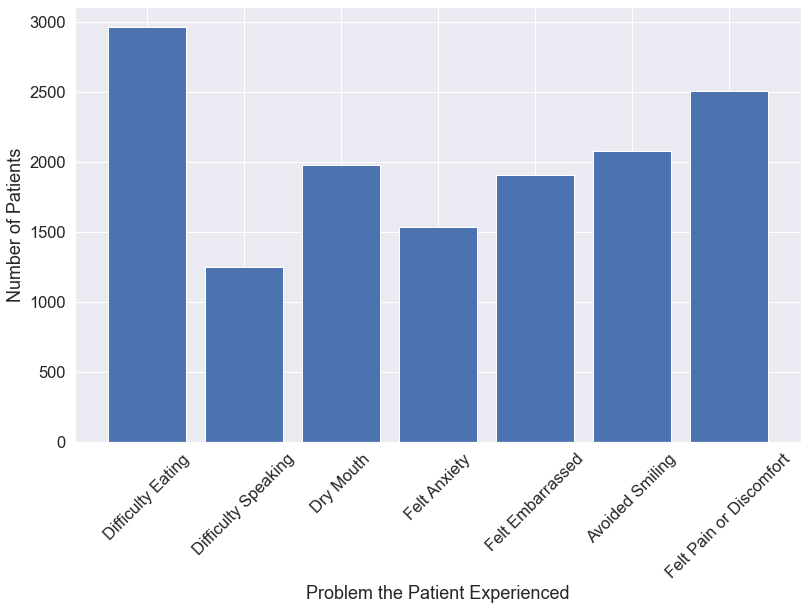

In [20]:
plt.bar(problems_df.Problem_Patient_Experienced, problems_df.Number_of_Patients)
plt.xlabel('Problem the Patient Experienced')
plt.xticks(rotation = 45)
plt.ylabel('Number of Patients')
plt.show()

The group presentation is specifying which colors to use ... which I can't control to that extent in plt.  Need to do in sns

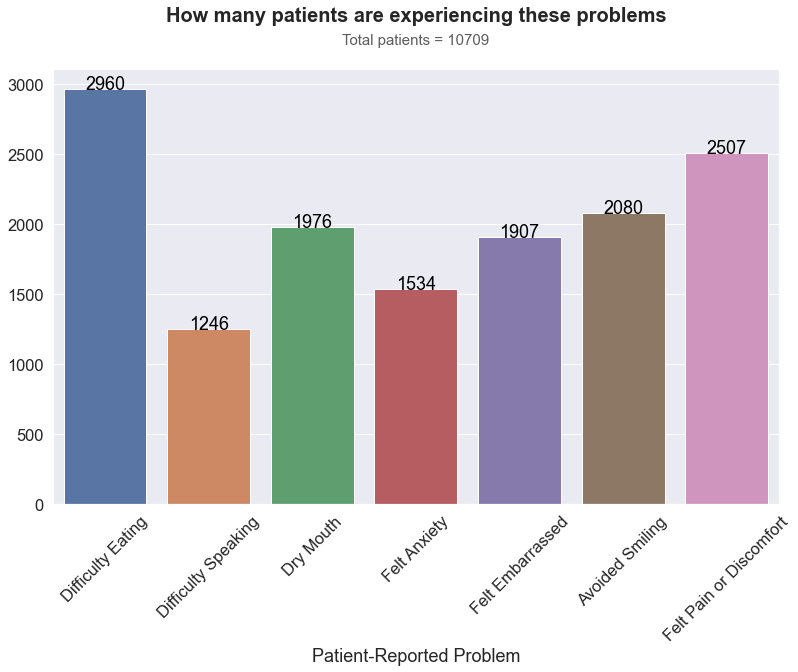

In [21]:
fig, ax = plt.subplots(figsize=(13,8))

p = sns.barplot(data=problems_df, x='Problem_Patient_Experienced', y='Number_of_Patients', ax=ax)
p.set_xticklabels(p.get_xticklabels(),rotation=45)
p.set(xlabel = 'Patient-Reported Problem', ylabel='')
p.text(x=0.5, y=1.1, s='How many patients are experiencing these problems', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.05, s='Total patients = 10709', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in problems_df.iterrows():
    p.text(row.name,row.Number_of_Patients, round(row.Number_of_Patients,2), color='black',ha='center')
    
#I don't know why - but it won't work when i organize by descending/ascending order.  Bars move, but numbers stay?

#I also can't get the color palette to work.  Perhaps do manually?  
#Note - changing the color to the desired HEX worked great in paint

In [22]:
#How many times did patients visit the clinics?
#patientcounts

patientcounts

2819117    18
3122030    18
2733641    17
2618156    16
2537143    16
           ..
3595687     1
2839372     1
2995626     1
2768299     1
2405048     1
Name: patient_id, Length: 5872, dtype: int64

In [23]:
patientcounts.describe()

count    5872.000000
mean        2.107800
std         1.957858
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        18.000000
Name: patient_id, dtype: float64

In [24]:
visits_df = pd.DataFrame(patientcounts,columns = ['Patient_ID','Number_of_Visits'])
visits_df.head()

,Patient_ID,Number_of_Visits


Okay - I cannot think of how to convert this to a DF ... So I'm going to do this badly.  
Export to csv.  
Edit csv in excel to get column titles.
reimport csv as df.  
It's not good - but i think it will work.

Note - since i was already being bad, went ahead and deleted row patient id = -1.  Can do it in python ... but why?

In [25]:
patientcounts.to_csv('../data/patientcounts.csv')

In [26]:
patientcounts = pd.read_csv('../data/patientcounts2.csv')

In [27]:
patientcounts.head()

,patient_id,number_of_visits
0,3212379,54
1,2441776,43
2,2758373,42
3,2431132,37
4,2416076,35


Text(0.5, 1.05, 'Total patients = 10709')

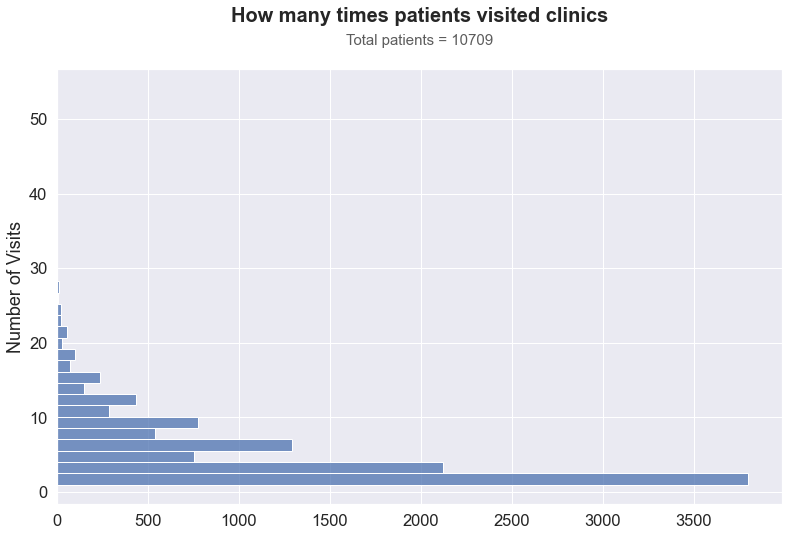

In [28]:
fig, ax = plt.subplots(figsize=(13,8))

v = sns.histplot(data = patientcounts, y = 'number_of_visits', bins=35, ax=ax)

v.set(xlabel='', ylabel='Number of Visits')
v.text(x=0.5, y=1.1, s='How many times patients visited clinics', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
v.text(x=0.5, y=1.05, s='Total patients = 10709', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

In [29]:
#patients who were having problems eating - what procedures did they receive?
#smileon_eating  2960

smileon_eating.head()

,patient_id,s_difficulty_eating,s_difficulty_speaking,s_drymouth,s_felt_anxiety,s_felt_embarrassed,s_avoided_smiling,s_pain_discomfort,imaging,plaque_removal,...,tooth_extractions_removals,sinus_perforation_closure,biopsy,alveoloplasty,excision_lesions,abscess_drain,pericoronalgingiva_excision,surgery_fibroustuberosity_reduction,emergencytreatment_dentalpain,occlusal_adjustment
0,2384106,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,12.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2384744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2384833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2384932,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2384949,1.0,1.0,1.0,0.0,1.0,1.0,1.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#i want counts of procedures in total for the one problem
eating = smileon_eating[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

In [31]:
eating2 = eating.sum()
eating2.head(20)

imaging                                1870.0
plaque_removal                         1010.0
sealant                                  12.0
medicament                             1408.0
amalgam_cavityfilling                  1483.0
dental_resin                           3426.0
dentalwork_repairs                     3476.0
prefab_steel_crown                        6.0
sedative_filling                         50.0
prefab_prosthetic                         7.0
therapeutic_pulpotomy                     4.0
tooth_extractions_removals              947.0
sinus_perforation_closure                 1.0
biopsy                                   47.0
alveoloplasty                           312.0
excision_lesions                         21.0
abscess_drain                             8.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain            13.0
dtype: float64

In [32]:
eatinglist = [
    ['Imaging',1870],
    ['Plaque Removal',1010],
    ['Sealant',12],
    ['Medicament',1408],
    ['Amalgam Cavity Filling',77],
    ['Dental Resin',3516],
    ['Damaged Dentalwork Repairs',51],
    ['Prefab Steel Crown',6],
    ['Sedative Filling',50],
    ['Prefab Dental Prosthetic',7],
    ['Therapeutic Pulpotomy',4],
    ['Tooth Extractions & Removals',947],
    ['Sinus Perforation Closure',1],
    ['Biopsy',47],
    ['Alveoloplasty',312],
    ['Excision of Lesions',2],
    ['Abscess Drain',8],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',13]]
eating_df = pd.DataFrame(eatinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
eating_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1870
1,Plaque Removal,1010
2,Sealant,12
3,Medicament,1408
4,Amalgam Cavity Filling,77


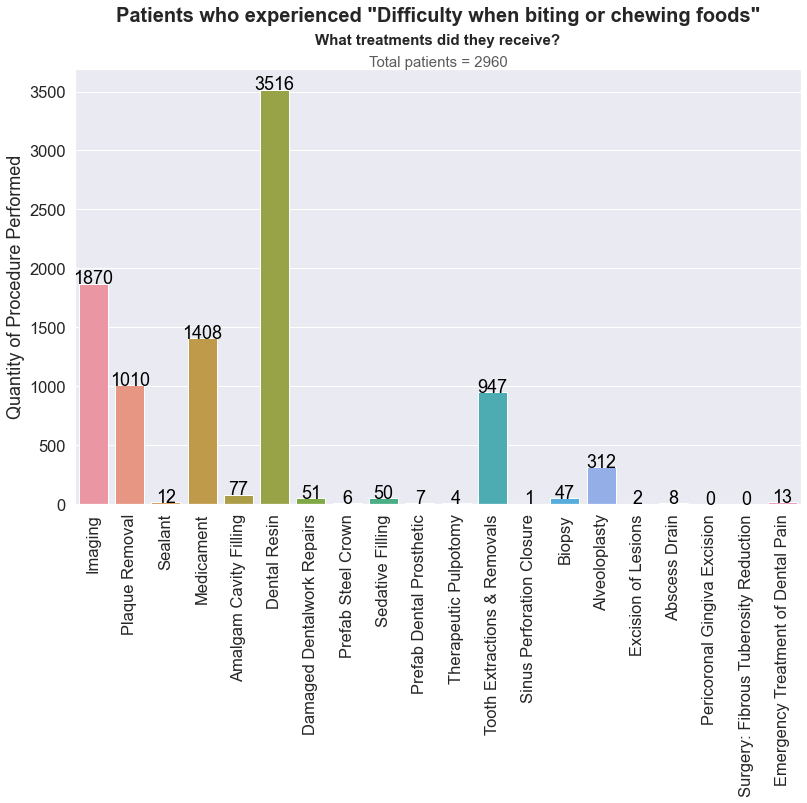

In [33]:
fig, ax = plt.subplots(figsize=(13,8))

e = sns.barplot(data=eating_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
e.set_xticklabels(e.get_xticklabels(),rotation=90)
e.set(xlabel = '', ylabel='Quantity of Procedure Performed')
e.text(x=0.5, y=1.1, s='Patients who experienced "Difficulty when biting or chewing foods"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
e.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
e.text(x=0.5, y=1.0, s='Total patients = 2960', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in eating_df.iterrows():
    e.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    

In [34]:
#patients who were having problems speaking - what procedures did they receive?
#smileon_speaking 1246

speaking = smileon_speaking[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

speaking2 = speaking.sum()
speaking2.head(20)

imaging                                 754.0
plaque_removal                          331.0
sealant                                   1.0
medicament                              454.0
amalgam_cavityfilling                   487.0
dental_resin                           1320.0
dentalwork_repairs                     1337.0
prefab_steel_crown                        2.0
sedative_filling                         12.0
prefab_prosthetic                         3.0
therapeutic_pulpotomy                     1.0
tooth_extractions_removals              472.0
sinus_perforation_closure                 1.0
biopsy                                   23.0
alveoloplasty                           191.0
excision_lesions                          4.0
abscess_drain                             4.0
pericoronalgingiva_excision               1.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             4.0
dtype: float64

In [35]:
speakinglist = [
    ['Imaging',754],
    ['Plaque Removal',331],
    ['Sealant',1],
    ['Medicament',454],
    ['Amalgam Cavity Filling',34],
    ['Dental Resin',1355],
    ['Damaged Dentalwork Repairs',17],
    ['Prefab Steel Crown',2],
    ['Sedative Filling',12],
    ['Prefab Dental Prosthetic',3],
    ['Therapeutic Pulpotomy',1],
    ['Tooth Extractions & Removals',472],
    ['Sinus Perforation Closure',1],
    ['Biopsy',23],
    ['Alveoloplasty',191],
    ['Excision of Lesions',0],
    ['Abscess Drain',4],
    ['Pericoronal Gingiva Excision',1],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',4]]
speaking_df = pd.DataFrame(speakinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
speaking_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,754
1,Plaque Removal,331
2,Sealant,1
3,Medicament,454
4,Amalgam Cavity Filling,34


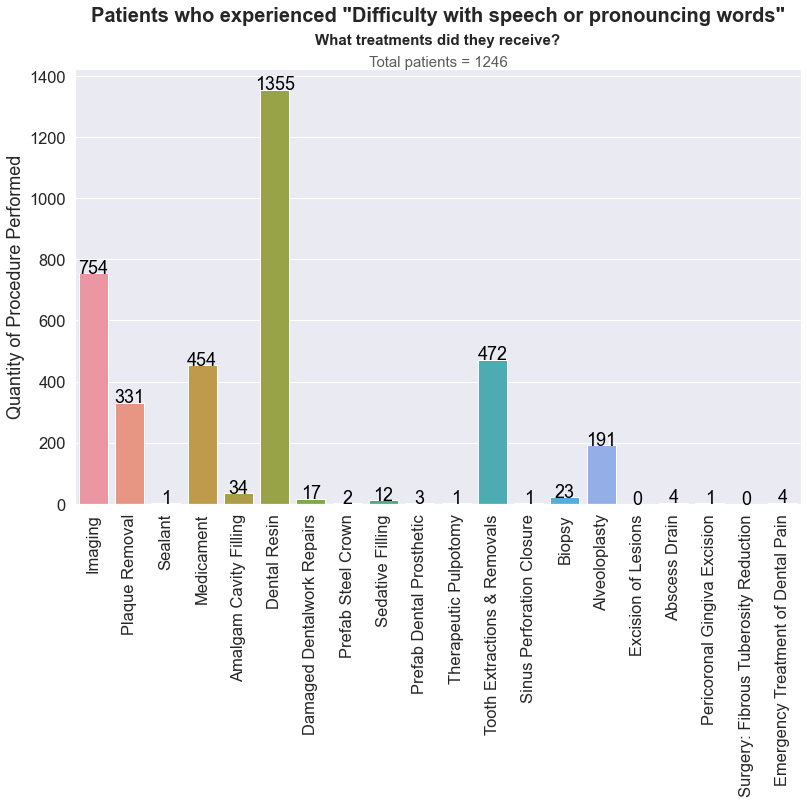

In [36]:
fig, ax = plt.subplots(figsize=(13,8))

sp = sns.barplot(data=speaking_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
sp.set_xticklabels(sp.get_xticklabels(),rotation=90)
sp.set(xlabel = '', ylabel='Quantity of Procedure Performed')
sp.text(x=0.5, y=1.1, s='Patients who experienced "Difficulty with speech or pronouncing words"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
sp.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
sp.text(x=0.5, y=1.0, s='Total patients = 1246', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in speaking_df.iterrows():
    sp.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    

In [37]:
#patients who were having problems with dry mouth - what procedures did they receive?
#smileon_drymouth 1976

drymouth = smileon_drymouth[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

drymouth2 = drymouth.sum()
drymouth2.head(20)

imaging                                1099.0
plaque_removal                          712.0
sealant                                  11.0
medicament                             1123.0
amalgam_cavityfilling                  1200.0
dental_resin                           2678.0
dentalwork_repairs                     2731.0
prefab_steel_crown                       10.0
sedative_filling                         37.0
prefab_prosthetic                         6.0
therapeutic_pulpotomy                     4.0
tooth_extractions_removals              621.0
sinus_perforation_closure                 0.0
biopsy                                   27.0
alveoloplasty                           171.0
excision_lesions                          8.0
abscess_drain                             6.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain            11.0
dtype: float64

In [38]:
drymouthlist = [
    ['Imaging',1099],
    ['Plaque Removal',712],
    ['Sealant',11],
    ['Medicament',1123],
    ['Amalgam Cavity Filling',80],
    ['Dental Resin',2747],
    ['Damaged Dentalwork Repairs',54],
    ['Prefab Steel Crown',10],
    ['Sedative Filling',37],
    ['Prefab Dental Prosthetic',6],
    ['Therapeutic Pulpotomy',4],
    ['Tooth Extractions & Removals',621],
    ['Sinus Perforation Closure',0],
    ['Biopsy',27],
    ['Alveoloplasty',171],
    ['Excision of Lesions',3],
    ['Abscess Drain',6],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',11]]
drymouth_df = pd.DataFrame(drymouthlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
drymouth_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1099
1,Plaque Removal,712
2,Sealant,11
3,Medicament,1123
4,Amalgam Cavity Filling,80


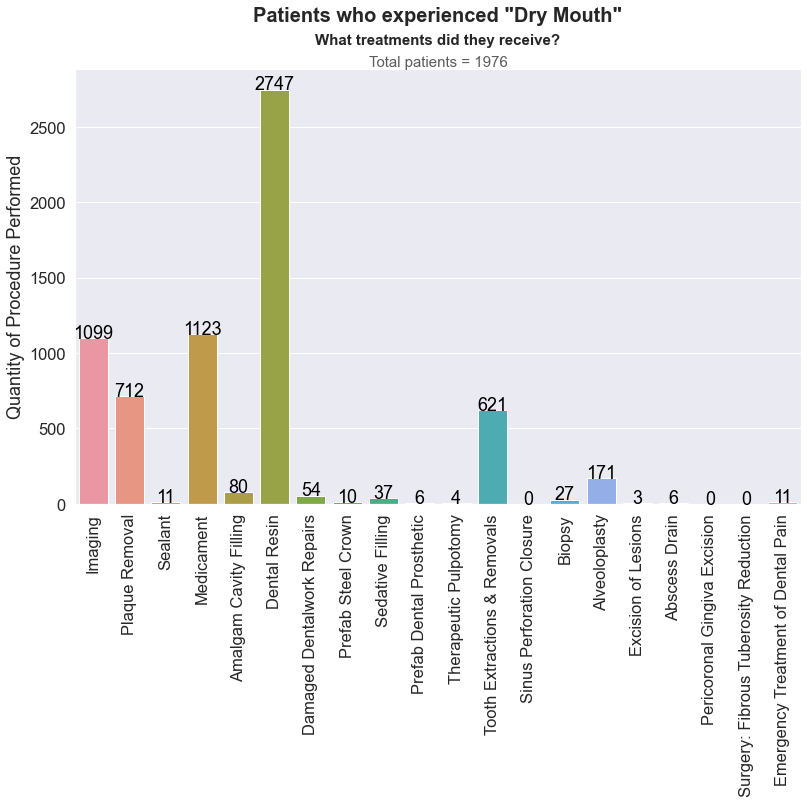

In [39]:
fig, ax = plt.subplots(figsize=(13,8))

d = sns.barplot(data=drymouth_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
d.set_xticklabels(d.get_xticklabels(),rotation=90)
d.set(xlabel = '', ylabel='Quantity of Procedure Performed')
d.text(x=0.5, y=1.1, s='Patients who experienced "Dry Mouth"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
d.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
d.text(x=0.5, y=1.0, s='Total patients = 1976', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in drymouth_df.iterrows():
    d.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    

In [40]:
#patients who were having problems with anxiety - what procedures did they receive?
#smileon_anxiety  1534

anxiety = smileon_anxiety[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

anxiety2 = anxiety.sum()
anxiety2.head(20)

imaging                                 883.0
plaque_removal                          524.0
sealant                                  13.0
medicament                              791.0
amalgam_cavityfilling                   840.0
dental_resin                           1926.0
dentalwork_repairs                     1965.0
prefab_steel_crown                        7.0
sedative_filling                         32.0
prefab_prosthetic                         6.0
therapeutic_pulpotomy                     3.0
tooth_extractions_removals              566.0
sinus_perforation_closure                 1.0
biopsy                                   29.0
alveoloplasty                           184.0
excision_lesions                         12.0
abscess_drain                             6.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             7.0
dtype: float64

In [41]:
anxietylist = [
    ['Imaging',883],
    ['Plaque Removal',524],
    ['Sealant',13],
    ['Medicament',791],
    ['Amalgam Cavity Filling',52],
    ['Dental Resin',1980],
    ['Damaged Dentalwork Repairs',40],
    ['Prefab Steel Crown',7],
    ['Sedative Filling',32],
    ['Prefab Dental Prosthetic',6],
    ['Therapeutic Pulpotomy',3],
    ['Tooth Extractions & Removals',566],
    ['Sinus Perforation Closure',1],
    ['Biopsy',29],
    ['Alveoloplasty',184],
    ['Excision of Lesions',0],
    ['Abscess Drain',6],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',7]]
anxiety_df = pd.DataFrame(anxietylist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
anxiety_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,883
1,Plaque Removal,524
2,Sealant,13
3,Medicament,791
4,Amalgam Cavity Filling,52


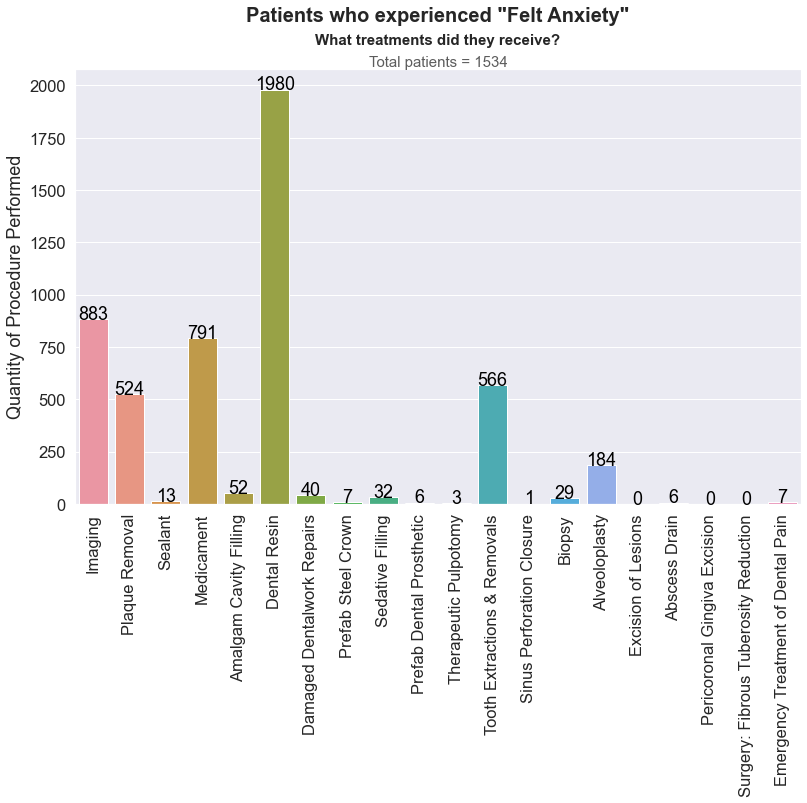

In [42]:
fig, ax = plt.subplots(figsize=(13,8))

a = sns.barplot(data=anxiety_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
a.set_xticklabels(a.get_xticklabels(),rotation=90)
a.set(xlabel = '', ylabel='Quantity of Procedure Performed')
a.text(x=0.5, y=1.1, s='Patients who experienced "Felt Anxiety"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
a.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
a.text(x=0.5, y=1.0, s='Total patients = 1534', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in anxiety_df.iterrows():
    a.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    

In [43]:
#patients who were having problems with feeling embarrassed - what procedures did they receive?
#smileon_embarrassed  1907

embarrassed = smileon_embarrassed[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

embarrassed2 = embarrassed.sum()
embarrassed2.head(20)


imaging                                1257.0
plaque_removal                          653.0
sealant                                   3.0
medicament                              994.0
amalgam_cavityfilling                  1042.0
dental_resin                           2370.0
dentalwork_repairs                     2405.0
prefab_steel_crown                        0.0
sedative_filling                         33.0
prefab_prosthetic                         6.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              711.0
sinus_perforation_closure                 1.0
biopsy                                   30.0
alveoloplasty                           221.0
excision_lesions                         12.0
abscess_drain                             5.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             9.0
dtype: float64

In [44]:
embarrassedlist = [
    ['Imaging',1257],
    ['Plaque Removal',653],
    ['Sealant',3],
    ['Medicament',994],
    ['Amalgam Cavity Filling',49],
    ['Dental Resin',2437],
    ['Damaged Dentalwork Repairs',36],
    ['Prefab Steel Crown',0],
    ['Sedative Filling',33],
    ['Prefab Dental Prosthetic',6],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',711],
    ['Sinus Perforation Closure',1],
    ['Biopsy',30],
    ['Alveoloplasty',221],
    ['Excision of Lesions',0],
    ['Abscess Drain',5],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',9]]
embarrassed_df = pd.DataFrame(embarrassedlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
embarrassed_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1257
1,Plaque Removal,653
2,Sealant,3
3,Medicament,994
4,Amalgam Cavity Filling,49


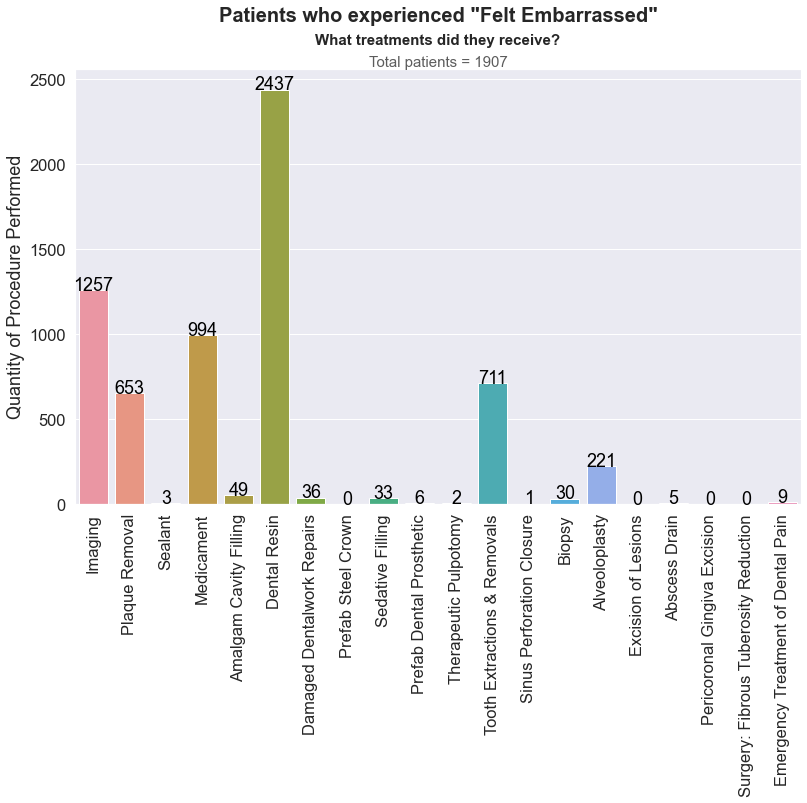

In [45]:
fig, ax = plt.subplots(figsize=(13,8))

em = sns.barplot(data=embarrassed_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
em.set_xticklabels(em.get_xticklabels(),rotation=90)
em.set(xlabel = '', ylabel='Quantity of Procedure Performed')
em.text(x=0.5, y=1.1, s='Patients who experienced "Felt Embarrassed"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
em.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
em.text(x=0.5, y=1.0, s='Total patients = 1907', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in embarrassed_df.iterrows():
    em.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    


In [46]:
#patients who were avoiding smiling - what procedures did they receive?
#smileon_smiling  2080

smiling = smileon_smiling[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

smiling2 = smiling.sum()
smiling2.head(20)


imaging                                1305.0
plaque_removal                          701.0
sealant                                   3.0
medicament                              921.0
amalgam_cavityfilling                   969.0
dental_resin                           2499.0
dentalwork_repairs                     2533.0
prefab_steel_crown                        0.0
sedative_filling                         32.0
prefab_prosthetic                         4.0
therapeutic_pulpotomy                     2.0
tooth_extractions_removals              767.0
sinus_perforation_closure                 1.0
biopsy                                   36.0
alveoloplasty                           276.0
excision_lesions                         12.0
abscess_drain                             5.0
pericoronalgingiva_excision               1.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain             7.0
dtype: float64

In [47]:
smilinglist = [
    ['Imaging',1305],
    ['Plaque Removal',701],
    ['Sealant',3],
    ['Medicament',921],
    ['Amalgam Cavity Filling',50],
    ['Dental Resin',2571],
    ['Damaged Dentalwork Repairs',35],
    ['Prefab Steel Crown',0],
    ['Sedative Filling',32],
    ['Prefab Dental Prosthetic',4],
    ['Therapeutic Pulpotomy',2],
    ['Tooth Extractions & Removals',767],
    ['Sinus Perforation Closure',1],
    ['Biopsy',36],
    ['Alveoloplasty',276],
    ['Excision of Lesions',2],
    ['Abscess Drain',5],
    ['Pericoronal Gingiva Excision',1],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',7]]
smiling_df = pd.DataFrame(smilinglist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
smiling_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1305
1,Plaque Removal,701
2,Sealant,3
3,Medicament,921
4,Amalgam Cavity Filling,50


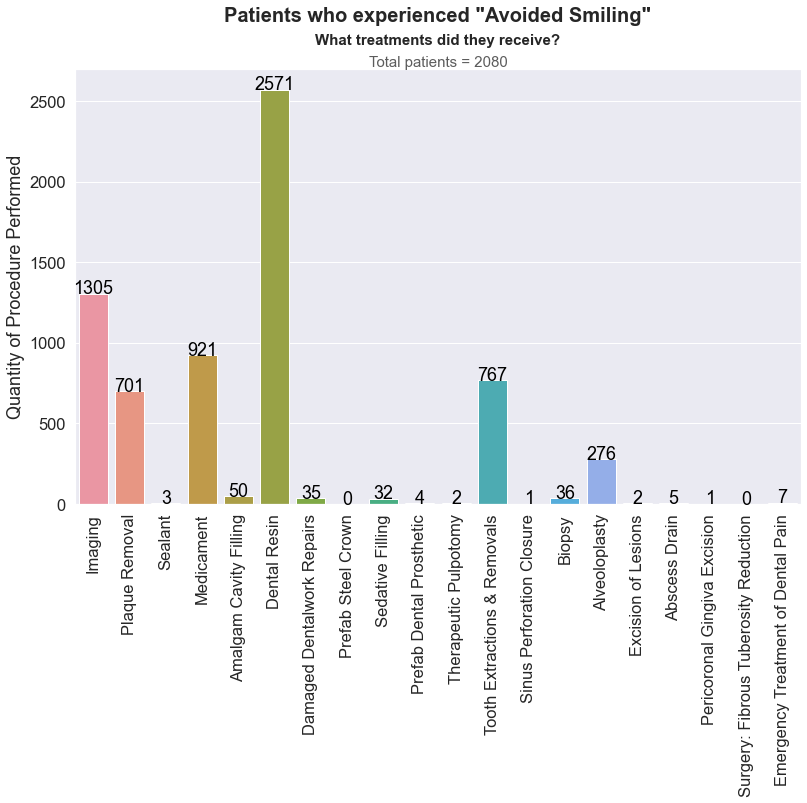

In [48]:
fig, ax = plt.subplots(figsize=(13,8))

s = sns.barplot(data=smiling_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
s.set(xlabel = '', ylabel='Quantity of Procedure Performed')
s.text(x=0.5, y=1.1, s='Patients who experienced "Avoided Smiling"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
s.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
s.text(x=0.5, y=1.0, s='Total patients = 2080', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in smiling_df.iterrows():
    s.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    

In [49]:
#patients who were having problems with pain and discomfort - what procedures did they receive?
#smileon_pain  2507

pain = smileon_pain[[
    'imaging',
    'plaque_removal',
    'sealant',
    'medicament',
    'amalgam_cavityfilling',
    'dental_resin',
    'dentalwork_repairs',
    'prefab_steel_crown',
    'sedative_filling',
    'prefab_prosthetic',
    'therapeutic_pulpotomy',
    'tooth_extractions_removals',
    'sinus_perforation_closure',
    'biopsy',
    'alveoloplasty',
    'excision_lesions',
    'abscess_drain',
    'pericoronalgingiva_excision',
    'surgery_fibroustuberosity_reduction',
    'emergencytreatment_dentalpain',
    'occlusal_adjustment'
]]

pain2 = pain.sum()
pain2.head(20)


imaging                                1595.0
plaque_removal                         1056.0
sealant                                  20.0
medicament                             1522.0
amalgam_cavityfilling                  1599.0
dental_resin                           3264.0
dentalwork_repairs                     3320.0
prefab_steel_crown                        8.0
sedative_filling                         50.0
prefab_prosthetic                         9.0
therapeutic_pulpotomy                     3.0
tooth_extractions_removals              912.0
sinus_perforation_closure                 1.0
biopsy                                   37.0
alveoloplasty                           286.0
excision_lesions                         13.0
abscess_drain                             9.0
pericoronalgingiva_excision               0.0
surgery_fibroustuberosity_reduction       0.0
emergencytreatment_dentalpain            16.0
dtype: float64

In [50]:
painlist = [
    ['Imaging',1595],
    ['Plaque Removal',1056],
    ['Sealant',20],
    ['Medicament',1522],
    ['Amalgam Cavity Filling',79],
    ['Dental Resin',3356],
    ['Damaged Dentalwork Repairs',57],
    ['Prefab Steel Crown',8],
    ['Sedative Filling',50],
    ['Prefab Dental Prosthetic',9],
    ['Therapeutic Pulpotomy',3],
    ['Tooth Extractions & Removals',912],
    ['Sinus Perforation Closure',1],
    ['Biopsy',37],
    ['Alveoloplasty',286],
    ['Excision of Lesions',0],
    ['Abscess Drain',9],
    ['Pericoronal Gingiva Excision',0],
    ['Surgery: Fibrous Tuberosity Reduction',0],
    ['Emergency Treatment of Dental Pain',16]]
pain_df = pd.DataFrame(painlist,columns = ['Dental_Treatment_Received','Number_of_Treatments_Performed'])
pain_df.head()

,Dental_Treatment_Received,Number_of_Treatments_Performed
0,Imaging,1595
1,Plaque Removal,1056
2,Sealant,20
3,Medicament,1522
4,Amalgam Cavity Filling,79


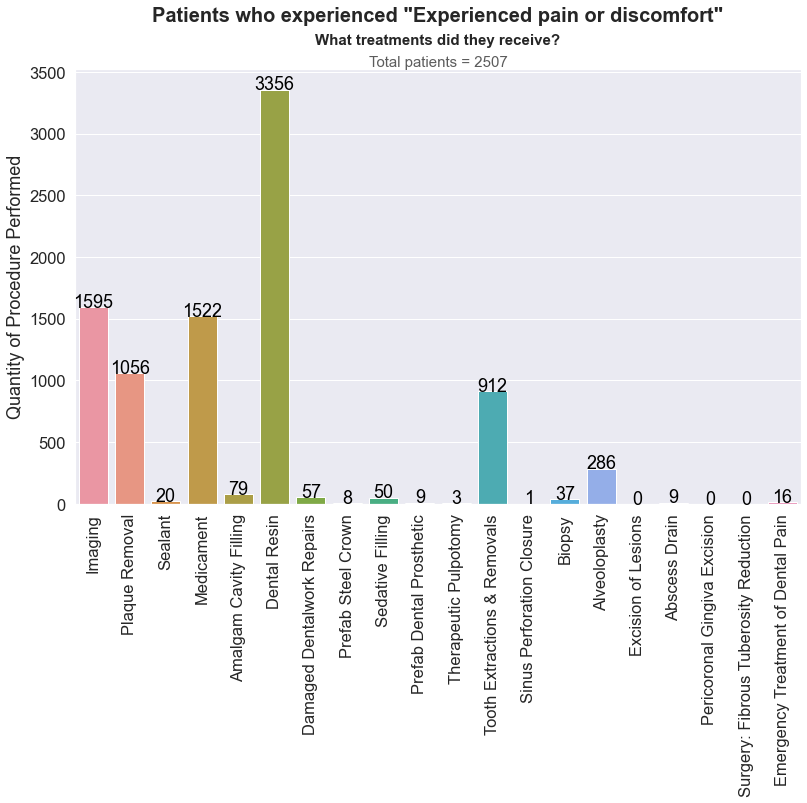

In [51]:
fig, ax = plt.subplots(figsize=(13,8))

p = sns.barplot(data=pain_df, x='Dental_Treatment_Received', y='Number_of_Treatments_Performed', ax=ax)
p.set_xticklabels(p.get_xticklabels(),rotation=90)
p.set(xlabel = '', ylabel='Quantity of Procedure Performed')
p.text(x=0.5, y=1.1, s='Patients who experienced "Experienced pain or discomfort"', fontsize=20, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.05, s='What treatments did they receive?', fontsize=15, weight='bold',ha='center',va='bottom',transform=ax.transAxes)
p.text(x=0.5, y=1.0, s='Total patients = 2507', fontsize=15, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

for index, row in pain_df.iterrows():
    p.text(row.name,row.Number_of_Treatments_Performed, round(row.Number_of_Treatments_Performed,2), color='black',ha='center')
    